# Proyecto señales y sistemas 2019-2
### Identificación de hablante utilizando transformada de Fourier

### Objetivo: 
Desarrollar un sistema de reconocimiento de hablante utilizando representación en frecuencia mediante transformada de Fourier y detección mediante distancia euclídea.

### Cuaderno de evaluación
Se pretende identificar el hablante con base a los datos capturados y procesados en el cuaderno main_entrenamiento.ipynb

## Nota: El siguiente cuaderno asume un solo hablante. Recuerde que cada grupo debe extender el entrenamiento para todos los integrantes del mismo, y generar un solo modelo.

### Paso 1: Cargar datos procesados en main_entranamiento.ipynb y definir umbral de distancia

Se debe cargar el archivo .pkl generado.

In [4]:
import pickle
filename = 'ent_sistemas.pkl' 
f = open(filename,'rb')
data = pickle.load(f)
data.keys() #elementos de los datos guardados


dict_keys(['R', 'XwR', 'fs'])

- Se debe definir un umbral de distancia euclídea sobre los espectros de Fourier para aceptar o no el nuevo registro. 

- Para ello se calcula la distancia euclídea entre los puntos de entrenamiento y el espectro mediana. 

- En este caso el umbral se fija como la distancia promedio más dos desviaciones estandard.

## Nota: cada grupo deberá definir su propio umbral buscando mejorar el rendimiento del sistema

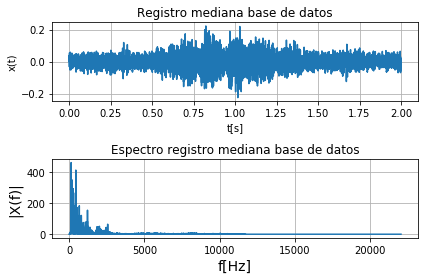

In [19]:
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
Xw_med = np.median(data['XwR'],axis=1)
Rmed = np.fft.irfft(Xw_med)
sd.play(Rmed,data['fs'])

plt.subplot(211)
plt.plot(np.arange(Rmed.shape[0])/data['fs'],Rmed)
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.title('Registro mediana base de datos')
plt.grid()

plt.subplot(212)
plt.plot(np.fft.rfftfreq(Rmed.shape[0],1/data['fs']),abs(Xw_med))
plt.xlabel("f[Hz]",fontsize = 14)
plt.ylabel("|X(f)|",fontsize = 14)
plt.title('Espectro registro mediana base de datos')
plt.grid()

plt.tight_layout()
plt.show()

In [20]:
from scipy.spatial.distance import cdist

D = cdist(Xw_med.reshape(1,-1),data['XwR'].T)
th = np.mean(D)+2*np.std(D)
print('Umbral de distancia= ',th)

Umbral de distancia=  2977.1305871735467


### Paso 2: Lectura nuevo registro a evaluar

Se utilizan las funciones para captura de microfóno del cuaderno de entrenamiento.

In [21]:
#captura nuevo registro
def captura_registro_eval(duration = 2,fs=44100,channels=1): # parámetros por defecto
    input("Presione una tecla para iniciar registro... ")
    print('Grabando (%.2f seg)...' % duration)
    a = sd.rec(int(duration * fs), samplerate=fs, channels=channels,  blocking=True)
    #reproducir registro para verificar validez
    vf = np.fft.rfftfreq(a.shape[0],1/fs)
    Xwn = np.fft.rfft(a,axis=0)
    
    sd.play(a,fs)
    
    plt.subplot(211)
    plt.plot(np.arange(a.shape[0])/fs,a)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.title('Registro nuevo')
    plt.grid()
    
    plt.subplot(212)
    plt.plot(vf,abs(Xwn))
    plt.xlabel("f[Hz]",fontsize = 14)
    plt.ylabel("|X(f)|",fontsize = 14)
    plt.title('Espectro registro nuevo')
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    ap = input('Aprueba el registro? (s/n): ')
    if ap == 's': registro = a # si el registro es correcto se guarda
    else : registro = 0
    return registro,Xwn

### Lectura nuevo registro

Presione una tecla para iniciar registro... 
Grabando (2.00 seg)...


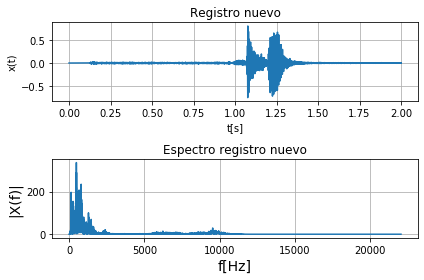

Aprueba el registro? (s/n): s


In [39]:
fs = data['fs'] #frecuencia de muestreo
duration = data['R'].shape[0]/fs #duracion de registros en segundos
registro_eval,Xwn = captura_registro_eval(duration = duration,fs=fs)

### Paso 3: comparar nuevo registro con la mediana de los registros capturados mediante distancia euclídea

In [40]:
dn = cdist(Xw_med.reshape(1,-1),Xwn.T)[0]

print('Distancia nuevo registro a mediana base de datos=%.2f\n (Umbral=%.2f)' 
      % (dn[0],th))

if dn < th: 
    print('Acceso APROBADO')
else:
    print('Acceso DENEGADO')



Distancia nuevo registro a mediana base de datos=2798.79
 (Umbral=2977.13)
Acceso APROBADO
